In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.base import ClusterMixin
from sklearn.base import BaseEstimator
sns.set(rc={'figure.figsize':(11.7,8.27)})
from random import *
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import MDS
from scipy.spatial.distance import cdist

In [35]:
runner = pd.read_csv("../../../output/data_clean/cleaned_runner.csv", index_col=0)
race = pd.read_csv("../../../output/data_clean/cleaned_race_2.csv", index_col= 0)
runner.age_range = pd.Categorical(
    runner.age_range, categories=['16-25','26-40','40-60','61+','Undefined'],ordered=True
)
runner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130137 entries, 0 to 137802
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   race_year_id     130137 non-null  int64   
 1   ranking          113523 non-null  float64 
 2   runner           130137 non-null  object  
 3   time             113523 non-null  object  
 4   gender           130108 non-null  object  
 5   nationality      130137 non-null  object  
 6   time_in_seconds  113523 non-null  float64 
 7   speed            113523 non-null  float64 
 8   runner_id        130108 non-null  object  
 9   age_course       128764 non-null  float64 
 10  age_range        130137 non-null  category
dtypes: category(1), float64(4), int64(1), object(5)
memory usage: 11.0+ MB


In [36]:
join = pd.merge(runner, race, left_on="race_year_id", right_on="race_year_id", how="left")
join = join.loc[join.speed < 20]
join = join.loc[join.distance > 150]

In [37]:
runner.ranking = join.ranking * 100 / join.participants

In [38]:
one_hot_gender = pd.get_dummies(runner['gender'], prefix = "gender")
runner = runner.drop('gender',axis = 1)
runner = runner.join(one_hot_gender)
runner = runner.dropna()

In [39]:
runner

,race_year_id,ranking,runner,time,nationality,time_in_seconds,speed,runner_id,age_course,age_range,gender_M,gender_W
0,68140,0.666667,VERHEUL Jasper,26H 35M 25S,GBR,95725.0,6.276730,VERHEULJasperGBRM30.0,30.0,26-40,1,0
1,68140,1.333333,MOULDING JON,27H 0M 29S,GBR,97229.0,6.179638,MOULDINGJONGBRM43.0,43.0,40-60,1,0
2,68140,2.000000,RICHARDSON Phill,28H 49M 7S,GBR,103747.0,5.791396,RICHARDSONPhillGBRM38.0,38.0,26-40,1,0
3,68140,2.666667,DYSON Fiona,30H 53M 37S,GBR,111217.0,5.402412,DYSONFionaGBRW55.0,55.0,40-60,0,1
4,68140,3.333333,FRONTERAS Karen,32H 46M 21S,GBR,117981.0,5.092684,FRONTERASKarenGBRW48.0,48.0,40-60,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
130132,2871,91.304348,ANANDY Didier,36H 12M 40S,FRA,130360.0,4.664314,ANANDYDidierFRAM46.0,37.0,26-40,1,0
130133,2871,93.478261,PARMENTIER Sebastien,36H 13M 0S,FRA,130380.0,4.663599,PARMENTIERSebastienFRAM40.0,31.0,26-40,1,0
130134,2871,95.652174,TALERIEN Thierry,36H 15M 33S,FRA,130533.0,4.658132,TALERIENThierryFRAM53.0,44.0,40-60,1,0
130135,2871,97.826087,POCHAT Joseph,36H 33M 43S,FRA,131623.0,4.619557,POCHATJosephFRAM47.0,38.0,26-40,1,0


<AxesSubplot:xlabel='axis1', ylabel='axis2'>

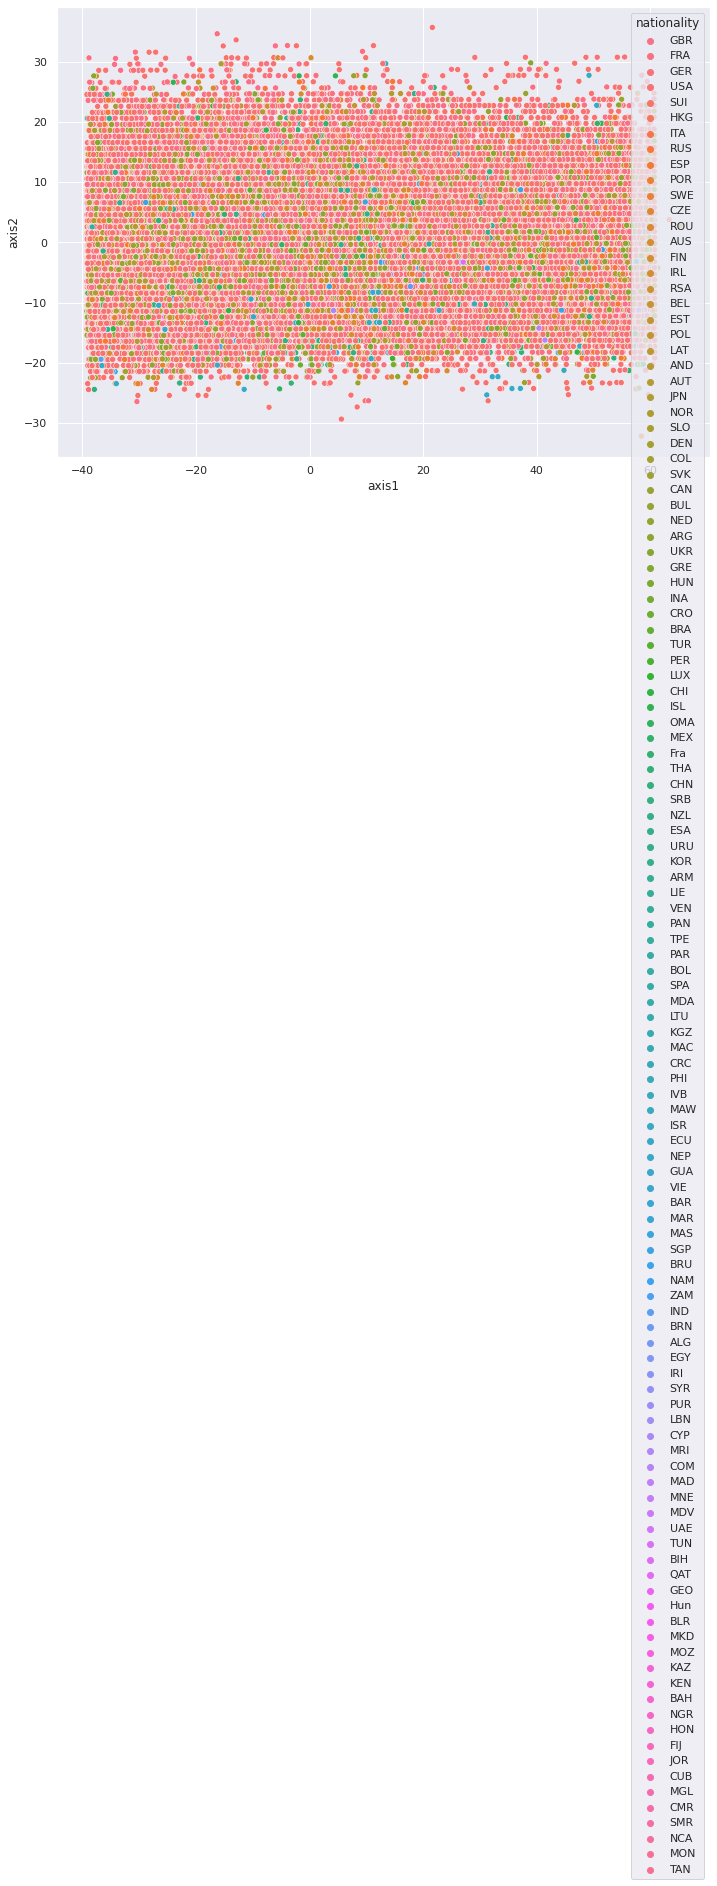

In [50]:
cls = PCA(n_components=5)
pcs = cls.fit_transform(runner[['ranking','speed','age_course','gender_M','gender_W']])

X = pd.DataFrame(pcs, columns=["axis1", "axis2","axis3","axis4","axis5"])
X.index = runner.index
X = pd.concat([X, runner.nationality], axis=1)


sns.scatterplot(x = "axis1", y = "axis2", hue = 'nationality', data = X)

In [44]:

 cls.explained_variance_ratio_

array([9.99999364e-01, 5.79215031e-07, 5.66270284e-08, 4.19389872e-10,
       1.96083962e-10])